In [1]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

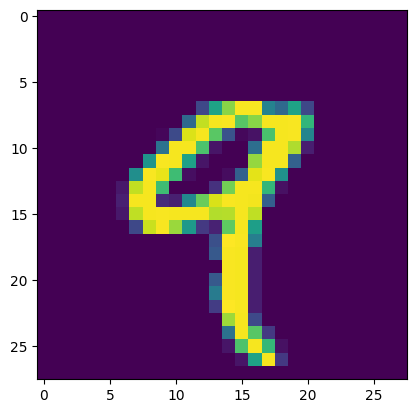

In [5]:
plt.imshow(X_train[4])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)


Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2840 - accuracy: 0.9191 - val_loss: 0.1446 - val_accuracy: 0.9575
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1238 - accuracy: 0.9628 - val_loss: 0.1149 - val_accuracy: 0.9668
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0863 - accuracy: 0.9733 - val_loss: 0.1043 - val_accuracy: 0.9706
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0655 - accuracy: 0.9803 - val_loss: 0.0989 - val_accuracy: 0.9715
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0977 - val_accuracy: 0.9722
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.1004 - val_accuracy: 0.9747
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0928 - val_accuracy

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [12]:
y_pred = y_prob.argmax(axis=1)

In [13]:
accuracy_score(y_test,y_pred)

0.9724

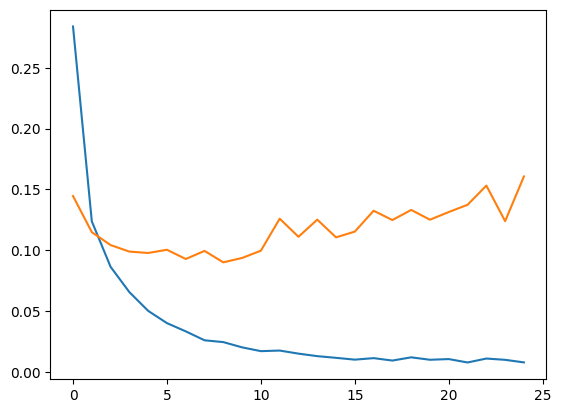

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

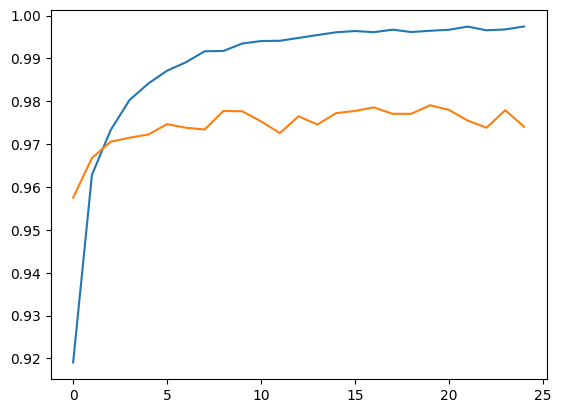

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


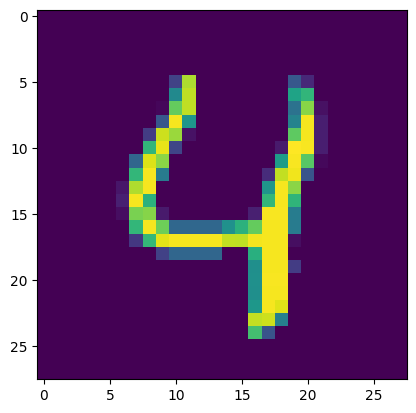

In [16]:
plt.imshow(X_test[4])

In [19]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([4], dtype=int64)